<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/SP/Camera_measurements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6> Wavelengths measurements with digital camera</font>

Evgeny Kolonsky, 2025

v.0.3.3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from scipy.optimize import fsolve
from math import degrees as deg

# Model

Theoretical expression for light diffraction when incident light assumed to be perpendicutalr to lattice is
$$
n \lambda = d \sin \beta_n,
\tag{1}
$$
where $\lambda$ - light wave length, $d$ - diffraction grating parameter, $n$ - order number, $\beta_n$ - deviation angle of order $n$ light beam.

When incident light falls under an arbitrary angle $\alpha_0$ to lattice plane perpendicular, the expression is written in form
$$ 2 d \sin\frac{\beta_n}{2} \cos\left(\alpha_0 +\frac{\beta_n}{2}\right)
= n \lambda
, \quad n =  \pm 1, \pm 2, ..
\tag{2}
$$
Here $\beta_n$ is the angle between incident light beam and  deviated beam of order $n$, which we can measure rather accurately in optical spectroscopy experiment.

For $\alpha_0=0$ (light falls ⟂) we receive eq.(1).

Otherwise we expect to see non-symmetry in deviation angles $\beta_{\pm n}$ .

## Lattice angle position


We can neither ensure $\alpha_0=0$ nor accurately measure $\alpha_0$ directly due to construction of the experiment set.

The unknown angle $\alpha_0$ between lattice plane perpendicular and light beam can be found indirectly by measuring $\beta_{\pm 1}$, even when lattice period $d$ and wavelength $\lambda$ are also unknown. For a pair $\pm n$ using eq.(2) we have  
$$
\sin \frac{\beta_{+n}}{2} \cos\left( \alpha_0 + \frac{\beta_{+n}}{2}\right) + \sin \frac{\beta_{-n}}{2} \cos\left( \alpha_0 + \frac{\beta_{-n}}{2}\right) =0.   
$$
We have one equation with one unknown parameter $\alpha_0$. It can be easiliy solved analytically. Denoting for first series $n=\pm1$
$$
c_{1} = \cos\frac{\beta_{+1}}{2}, \quad s_{1} = \sin\frac{\beta_{+1}}{2}, \\
c_{2} = \cos\frac{\beta_{-1}}{2}, \quad s_{2} = \sin\frac{\beta_{-1}}{2}, \\
C = c_{1} s_{1} + c_{2} s_{2}, \quad
D = s_{1}^2 + s_{2}^2
$$
we found
$$
\alpha_0 = \arccos\frac{D}{\sqrt{C^2+D^2}}.
$$
Since we measure $\beta_n$ rather accurately, accuracy of $\alpha_0$ is also reasonably high. Uncertainty of $\alpha_0$ can be decreased further by averaging $\alpha_0$ for all known pairs.  

In [2]:
def get_alpha0(beta_plus, beta_minus):
  c1 = np.cos(beta_plus/2)
  s1 = np.sin(beta_plus/2)
  c2 = np.cos(beta_minus/2)
  s2 = np.sin(beta_minus/2)
  D = s1*s1 + s2*s2
  C = c1*s1 + c2*s2
  acos =  D / np.sqrt(C*C + D*D)
  alpha0_arr = np.arccos(acos)
  alpha0 = np.mean(alpha0_arr)
  alpha0_err = np.std(alpha0_arr) / np.sqrt(len(alpha0_arr) - 1)
  return alpha0, alpha0_err

def get_pairs(beta, colors, orders):
  def get_pair(color_ind, order):
    beta_plus = beta[(color_index == color_ind) & (n == order)]
    beta_minus = beta[(color_index == color_ind) & (n == -order)]
    if len(beta_plus) == 1 and len(beta_minus) == 1:
      return (beta_plus[0], beta_minus[0])
    else:
      return None
  betas = [get_pair(color_ind, order) for color_ind in np.unique(colors) for order in np.unique(orders)]
  beta_plus = np.array([b[0] for b in betas if b is not None])
  beta_minus = np.array([b[1] for b in betas if b is not None])
  return beta_plus, beta_minus

# Measurements

## Mercury

Measuring lattice parameter $d$ with Mercury lamp

Measured with spectrograph

![H](https://github.com/tphlabs/data/blob/main/Lab4_SP/mercury.png?raw=true')

In [8]:
# lattice parameter estimation with Merucry green line

measurements = '''
# color_index beta(degrees) order
# 1 - violet, 2 blue, 3 green, 4,5 - yellow, 6,7 - red
# order color_index theta
1 1 7.02
1 2 7.515
1 3 9.45
1 4 9.99
2 1 14.085
# undefined 14.625
2 2 15.12
2 3 19.035
3 3 29.16
4 3 40.14
-1 1 -7.065
-1 2 -7.605
-1 3 -9.585
-1 4 -10.125
-2 1 -14.625
# undefined -14.895
-2 2 -15.39
-2 3 -19.53
-2 4 -20.7
-2 5 -20.745
-3 1 -21.825
-3 2 -23.625
#  undefined -29.88
-3 3 -30.33
-3 4 -32.22
-3 5 -32.4
-4 1 -32.535 # color not sure
-4 3 -42.66
'''

n, color_index, beta = np.genfromtxt(measurements.splitlines(), unpack=True)

beta *= np.pi / 180

beta_plus, beta_minus = get_pairs(beta, color_index, n)

alpha0, alpha0_err = get_alpha0(beta_plus, beta_minus)
print(f'alpha0: {deg(alpha0):.1f} ± {deg(alpha0_err):.1f} degree')


alpha0: 4.6 ± 0.4 degree


In [9]:
beta_green = beta[color_index == 3]
n_green = n[color_index == 3]

lmbd_green = 546e-9 #m
d_arr = n_green * lmbd_green / ( 2 * np.sin(beta_green/2) * np.cos(-alpha0 + beta_green/2) )
d = np.mean(d_arr)
d_err = np.std(d_arr) / np.sqrt(len(d_arr) - 1)
print(rf'd = {d *1e6:.3f} ± {d_err*1e6:.3f} um')
print(rf'd nominal 7500/inch = {25.4e-3 / 7500 *1e6:.3f} um')


d = 3.316 ± 0.004 um
d nominal 7500/inch = 3.387 um


d = 3.316 um
Violet 404     : lambda = 411.3 ± 4.8 nm, 6 points
Blue 436       : lambda = 434.8 ± 0.3 nm, 5 points
Green 546      : lambda = 546.0 ± 0.7 nm, 8 points
yellow 577     : lambda = 576.1 ± 0.8 nm, 4 points
yellow 579     : lambda = 576.9 ± 0.1 nm, 2 points


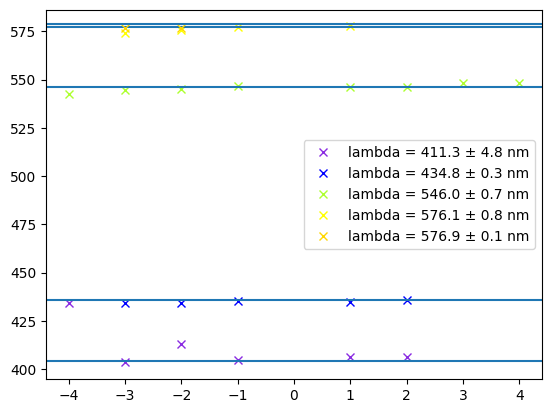

In [10]:
colors = ['Unknown', 'Violet 404', 'Blue 436', 'Green 546', 'yellow 577','yellow 579']
python_colors = ['gray',     'blueviolet', 'blue',    'greenyellow','yellow', 'gold']
nominal_waves = [np.NaN, 404, 436, 546, 577, 579]

print(rf'd = {d*1e6:.3f} um')

for ix in range(1, len(colors)):
  b = beta[color_index == ix]
  n_ix =  n[color_index == ix]
  lmbd = 2 * d *  np.sin(b / 2) * np.cos(-alpha0 + b / 2) /n_ix
  lmbd_mean = np.mean(lmbd)
  lmbd_err = np.std(lmbd) / np.sqrt(len(lmbd) - 1)
  lmbd_n = len(lmbd)
  print(rf'{colors[ix]:<15}: lambda = {lmbd_mean*1e9:.1f} ± {lmbd_err*1e9:.1f} nm, {lmbd_n:d} points' )

  plt.plot(n_ix, 2 * d *  np.sin(b / 2) * np.cos(-alpha0 + b / 2) /n_ix *1e9, 'x', color=python_colors[ix],
           label=f'lambda = {lmbd_mean*1e9:.1f} ± {lmbd_err*1e9:.1f} nm')
  plt.axhline(nominal_waves[ix])
  plt.legend()


## Helium

Measured with spectrograph

![He](https://github.com/tphlabs/data/blob/main/Lab4_SP/helium.png?raw=true')

d = 3.316 um
alpha0: 3.1 ± 0.2 degree
Violet 389     : lambda = 389.4 ± 0.6 nm, 4 points
Blue448        : lambda = 447.4 ± 0.4 nm, 5 points
Blue472        : lambda = 470.8 ± 0.4 nm, 4 points
Green492       : lambda = 492.6 ± 0.5 nm, 4 points
Green501       : lambda = 501.8 ± 0.4 nm, 3 points
Yellow588      : lambda = 587.8 ± 0.6 nm, 8 points
Red668         : lambda = 668.4 ± 0.7 nm, 3 points
Red707         : lambda = 705.8 ± 0.4 nm, 2 points


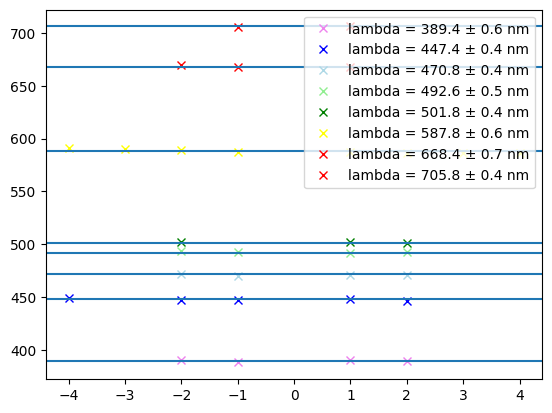

In [34]:
colors = ['Unidentified', 'Violet 389', 'Blue448', 'Blue472', 'Green492', 'Green501', 'Yellow588', 'Red668', 'Red707']
python_colors = ['gray', 'violet', 'blue', 'lightblue', 'lightgreen', 'green', 'yellow', 'red', 'red']
nominal_waves = [np.NaN, 389, 448, 472, 492, 501, 588, 668, 707]

print(rf'd = {d*1e6:.3f} um')

measurements = '''
# order, coor_index beta(degrees)
1 1 6.75
1 2 7.74
1 3 8.145
1 4 8.505
1 5 8.685
1 6 10.17
1 7 11.565
1 8 12.24
2 1 13.5
2 2 15.525
2 3 16.38
2 4 17.145
2 5 17.46
2 6 20.52
3 6 31.546
4 6 43.83
-1 1 -6.75
-1 2 -7.785
-1 3 -8.19
-1 4 -8.595
-1 6 -10.26
-1 7 -11.7
-1 8 -12.375
-2 1 -13.725
-2 2 -15.795
-2 3 -16.695
-2 4 -17.505
-2 5 -17.82
-2 6 -21.06
-2 7 -24.165 # not sure
-3 0 -24.3
# undefined -25.74
-3 0 -26.955 # not sure
-3 0 -27.54 # not sure
-3 6 -32.895
-4 2 -33.435 # not sure
-4 6 -46.98
'''

n, color_index, beta = np.genfromtxt(measurements.splitlines(), unpack=True)

beta *= np.pi / 180

beta_plus, beta_minus = get_pairs(beta, color_index, n)

alpha0, alpha0_err = get_alpha0(beta_plus, beta_minus)
print(f'alpha0: {deg(alpha0):.1f} ± {deg(alpha0_err):.1f} degree')


for ix in range(1, 9):
  b = beta[color_index == ix]
  n_ix =  n[color_index == ix]
  lmbd = 2 * d *  np.sin(b / 2) * np.cos(-alpha0 + b / 2) /n_ix
  lmbd_mean = np.mean(lmbd)
  lmbd_err = np.std(lmbd) / np.sqrt(len(lmbd) - 1)
  lmbd_n = len(lmbd)
  print(rf'{colors[ix]:<15}: lambda = {lmbd_mean*1e9:.1f} ± {lmbd_err*1e9:.1f} nm, {lmbd_n:d} points' )

  plt.plot(n_ix, 2 * d *  np.sin(b / 2) * np.cos(-alpha0 + b / 2) /n_ix *1e9, 'x', color=python_colors[ix],
           label=f'lambda = {lmbd_mean*1e9:.1f} ± {lmbd_err*1e9:.1f} nm')
  plt.axhline(nominal_waves[ix])
  plt.legend()


## Hydrogen

Measured with spectrograph

![H](https://github.com/tphlabs/data/blob/main/Lab4_SP/hydrogen.png?raw=true')

d = 3.316 um
alpha0: 2.3 ± 0.5 degree
Violet 434     : lambda = 433.4 ± 1.1 nm, 2 points
Cian 486       : lambda = 487.3 ± 0.5 nm, 5 points
Red 657        : lambda = 659.5 ± 1.2 nm, 4 points


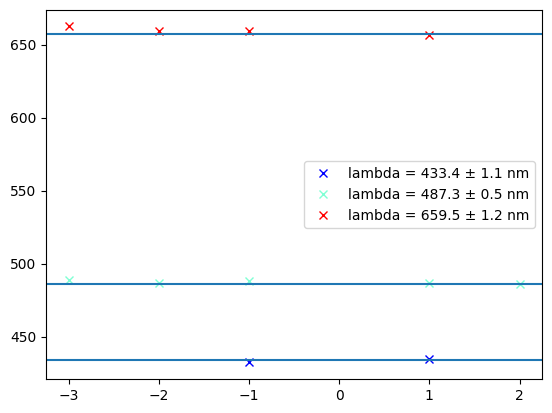

In [11]:
colors = ['Unidentified', 'Violet 434', 'Cian 486', 'Red 657']
python_colors = ['gray', 'blue', 'aquamarine', 'red']
nominal_waves = [np.NaN, 434, 486, 657]

print(rf'd = {d*1e6:.3f} um')

measurements = '''
# order, coor_index beta(degrees)
-1 1 -7.515
-1 2 -8.49
-1 3 -11.52
-2 2 -17.19
-2 3 -23.67
-3 2 -26.55
-3 3 -37.44
1 1 7.515
1 2 8.415
1 3 11.385
2 2 16.965
'''

n, color_index, beta = np.genfromtxt(measurements.splitlines(), unpack=True)

beta *= np.pi / 180

beta_plus, beta_minus = get_pairs(beta, color_index, n)

alpha0, alpha0_err = get_alpha0(beta_plus, beta_minus)
print(f'alpha0: {deg(alpha0):.1f} ± {deg(alpha0_err):.1f} degree')


for ix in range(1, 4):
  b = beta[color_index == ix]
  n_ix =  n[color_index == ix]
  lmbd = 2 * d *  np.sin(b / 2) * np.cos(-alpha0 + b / 2) /n_ix
  lmbd_mean = np.mean(lmbd)
  lmbd_err = np.std(lmbd) / np.sqrt(len(lmbd) - 1)
  lmbd_n = len(lmbd)
  print(rf'{colors[ix]:<15}: lambda = {lmbd_mean*1e9:.1f} ± {lmbd_err*1e9:.1f} nm, {lmbd_n:d} points' )

  plt.plot(n_ix, 2 * d *  np.sin(b / 2) * np.cos(-alpha0 + b / 2) /n_ix *1e9, 'x', color=python_colors[ix],
           label=f'lambda = {lmbd_mean*1e9:.1f} ± {lmbd_err*1e9:.1f} nm')
  plt.axhline(nominal_waves[ix])
  plt.legend()


# References

- "Physics Laboratory Manual", 3d ed., Wall , Levine and Christensen, Experiment 75 Wave Length of Light: Diffraction Grating, p.297, eq.75.2 and 75.3
